<a href="https://colab.research.google.com/github/Kedree/DataAnalysisUMF/blob/main/Midterm/Used_Car_Midterm_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Car Midterm Data Visualization Project**
#### Kedree Proffitt, Landon Rollins, Zac Whitney

## **Description of Goals**
By analyzing  used car data we can infer many great insights into the used car market and perhaps discover what can make cars sell for more than others.

The first step is of course data cleaning.

Presentation video: https://youtu.be/qhxcd43UfY0

Imports:

In [1]:
import pandas as pd # Imports
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker

In [2]:
from google.colab import drive # For drive mounting
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Cleaning**

```Kedree```

The data was too bloated to upload so it had to be cleaned in R instead of python, see the R code by checking the github, for a point of reference the data was cleaned from 1.25 GB as a 426,880 x 26 to a 50 MB 375,249 x 16 by getting rid of useless columns and removing outliers like 9,999,999 on odometers. 🎉

Side note I also used Excel's data filtering to find weird responses, deleting buses, salvage cars, turning "others" into blanks, etc.

The new size is 375,249 x 16.

In [3]:
#Kedree
usedCar = pd.read_csv('/content/drive/MyDrive/DATA/vehiclesClean3.csv') # Taking our used car data and storing it for use
usedCar.head(5) # Confirmation of success

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,region,posting_date
0,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923,clean,NaN,NaN,NaN,pickup,white,alabama,2021-05-04T12:31:18-0500
1,22590.0,2010,chevrolet,silverado 1500,good,8.0,gas,71229,clean,NaN,NaN,NaN,pickup,blue,alabama,2021-05-04T12:31:08-0500
2,39590.0,2020,chevrolet,silverado 1500 crew,good,8.0,gas,19160,clean,NaN,NaN,NaN,pickup,red,alabama,2021-05-04T12:31:25-0500
3,30990.0,2017,toyota,tundra double cab sr,good,8.0,gas,41124,clean,NaN,NaN,NaN,pickup,red,alabama,2021-05-04T10:41:31-0500
4,15000.0,2013,ford,f-150 xlt,excellent,6.0,gas,128000,clean,automatic,rwd,full-size,truck,black,alabama,2021-05-03T14:02:03-0500


In [ ]:
usedCar.info()#Kedree

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375249 entries, 0 to 375248
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         375249 non-null  float64
 1   year          375249 non-null  int64  
 2   manufacturer  361941 non-null  object 
 3   model         371202 non-null  object 
 4   condition     232870 non-null  object 
 5   cylinders     221544 non-null  float64
 6   fuel          345851 non-null  object 
 7   odometer      375249 non-null  int64  
 8   title_status  368692 non-null  object 
 9   transmission  313533 non-null  object 
 10  drive         261763 non-null  object 
 11  size          105152 non-null  object 
 12  type          295918 non-null  object 
 13  paint_color   266336 non-null  object 
 14  region        375249 non-null  object 
 15  posting_date  375249 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 45.8+ MB


```Kedree```

Data looks good, see the R code in the github for cleaning process!

Many of the null cylinders are just missing data but a portion are electric cars!

## **Data Exploration**

### Basic Statistics

```Kedree```

In [ ]:
usedCar.describe()

,price,year,cylinders,odometer
count,375249.000000,375249.000000,221544.000000,375249.000000
mean,19187.030801,2011.325472,5.964346,94079.499682
std,15070.778744,8.458822,1.593545,65052.768175
min,201.000000,1951.000000,3.000000,42.000000
25%,7575.000000,2008.000000,4.000000,39649.000000
50%,15889.000000,2013.000000,6.000000,88310.000000
75%,27990.000000,2017.000000,8.000000,136000.000000
max,299991.000000,2022.000000,12.000000,747776.000000


```Kedree```

The price ranges from \$200 to \$299,991 when checking the data it shows that its like 4 blue lamborghini huracans and one random chrysler, good enough! The lambo seems to be repeat listings probably to different craigslist pages / counts. It shouldn't throw things off too much and this process is probably to diffiuclt to fix for what its worth. The averages seem a lot better when cleaned, average car year is 2011, average odometer is about 94,000 miles, these line up! $19,000 average car feels a little low but it makes sense for craigslist mostly used cars.

Average cylinders is 5.96, seems a bit high to me but I'm not a car guy, there are some electric cars and missing data as well that have blanks!

### Correlation Matrix
```Kedree```

In [ ]:
#Kedree
carCorr = usedCar.corr() # Getting the data's correlation matrix
carCorr # show the corr matrix

,price,year,cylinders,odometer
price,1.000000,0.383196,0.343814,-0.490578
year,0.383196,1.000000,-0.158831,-0.378240
cylinders,0.343814,-0.158831,1.000000,0.035710
odometer,-0.490578,-0.378240,0.035710,1.000000


[Text(0, 0, 'price'),
 Text(0, 0, 'year'),
 Text(0, 0, 'cylinders'),
 Text(0, 0, 'odometer')]

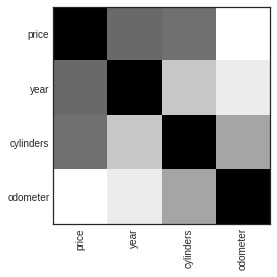

In [ ]:
#Kedree

plt.style.use("seaborn-white")

plt.figure() # Create a figure to be changed
plt.imshow(carCorr, cmap='binary', interpolation='nearest') # make the figure a corr matrix
ax = plt.gca() # get the current axis
plt.xticks(rotation=90) # rotate the x ticks labels by 90
ax.set_xticks(range(len(carCorr.columns))) # The xticks are from 0 to the number of columns-1
ax.set_xticklabels(carCorr.columns) # then set the labels of the created ticks

ax.set_yticks(range(len(carCorr.columns))) # repeat for y the exact same as it is a corr matrix
ax.set_yticklabels(carCorr.columns)

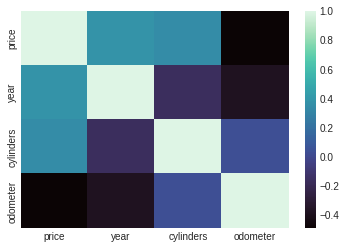

In [ ]:
#Kedree
sns.heatmap(carCorr, cmap='mako') # wow this is a lot easier and nicer!

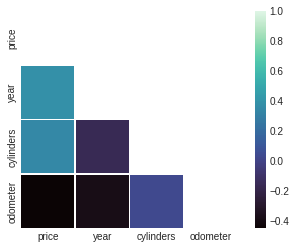

In [ ]:
#Kedree
mask = np.zeros_like(carCorr, dtype=bool) # I think this defines which squares to hide?
mask[np.triu_indices_from(mask)] = True # And this hides them?
sns.heatmap(carCorr, mask=mask, cmap='mako', vmin=-0.45, vmax=1, square=True, linewidths=.5) # this makes the sns heatmap with the mask, my cmap color of mako, can mess around with vmax and min, square makes it look pretty and linewidth is ditto
# Interesting notes here, Selling + Year, mileage + year, KM - Year, Power + Price, engine + km driven, seats + km driven, engine - mileage, power + engine, seats + engine, power + seats A LOT TO WORK WITH
# Most important for the theme of this project is the selling price row and col

## Data  Visualization
### Histograms
```Kedree```

<Figure size 576x396 with 0 Axes>

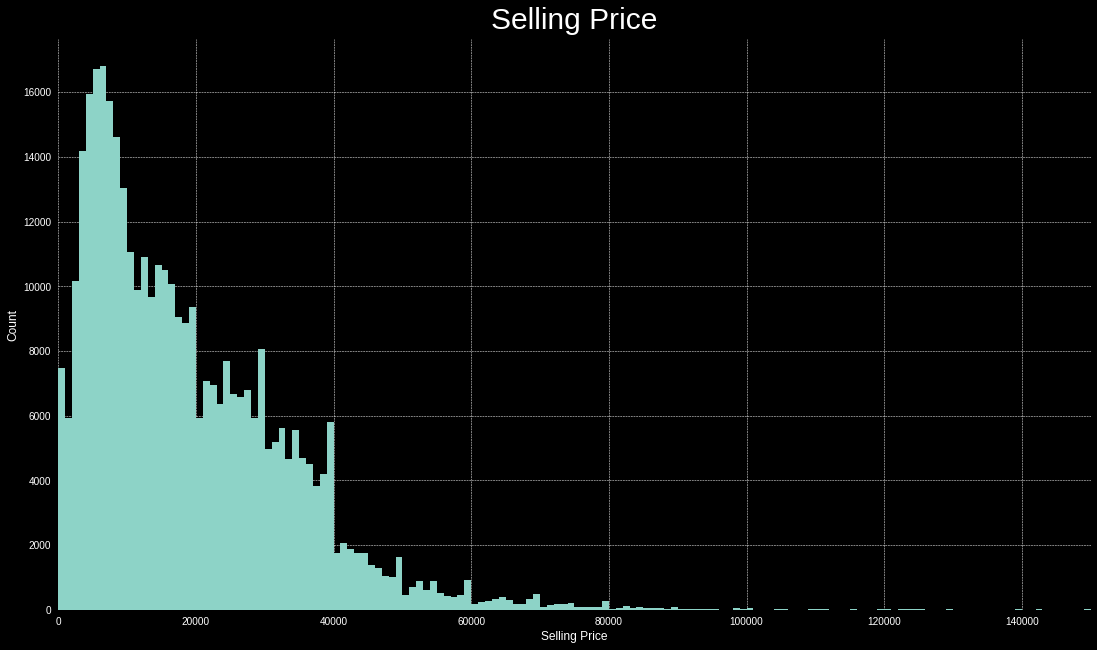

In [ ]:
# Kedree
plt.style.use("dark_background") # Make the background black
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['price'] # The used car prices is our histogram x axis
bins = range(0, 300000, 1000) # With bins from 0 to 300,000 of size 1,000

plt.xlim(0, 150000) # The plot outside of 150,000 was just super small so I limited it to 150,000

ax = plt.hist(histX, bins)
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.set_ylabel("Count")
ax.set_xlabel("Selling Price")

plt.title('Selling Price', fontdict={'fontsize': 30}, pad=10) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value so it looks nice
plt.show()

<Figure size 576x396 with 0 Axes>

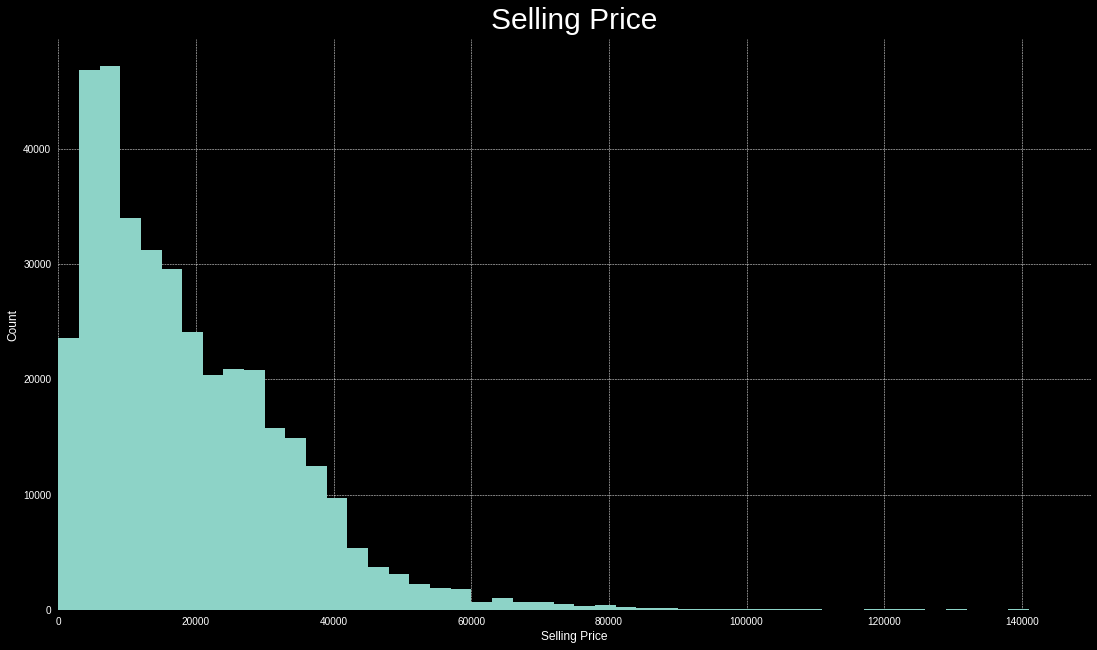

In [ ]:
# Kedree Variations here below with different bin sizes
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['price']
bins = range(0, 300000, 3000)

ax = plt.hist(histX, bins)
ax = plt.gca()

plt.xlim(0, 150000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.set_ylabel("Count")
ax.set_xlabel("Selling Price")

plt.title('Selling Price', fontdict={'fontsize': 30}, pad=10) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value 35 so it looks nice
plt.show()

<Figure size 576x396 with 0 Axes>

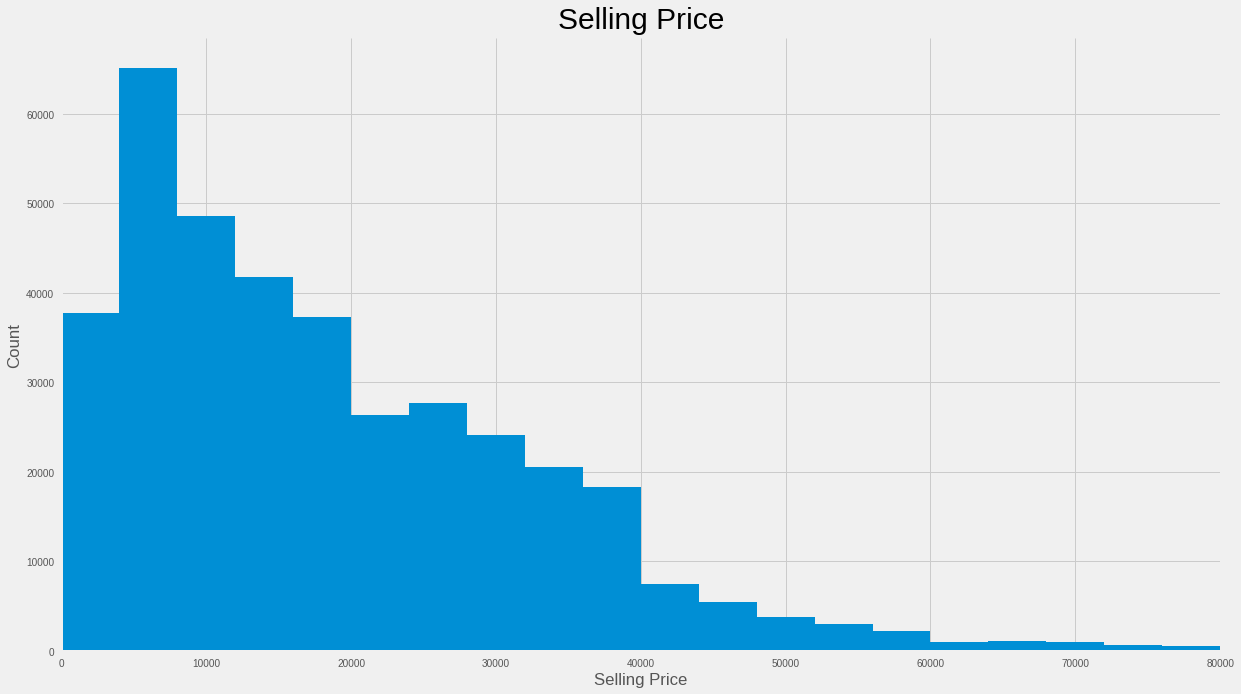

In [ ]:
# Kedree
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['price']
bins = range(0, 300000, 4000)

ax = plt.hist(histX, bins)
ax = plt.gca()

plt.xlim(0, 80000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.set_ylabel("Count")
ax.set_xlabel("Selling Price")

plt.title('Selling Price', fontdict={'fontsize': 30}, pad=10) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value 35 so it looks nice
plt.show()

<Figure size 576x396 with 0 Axes>

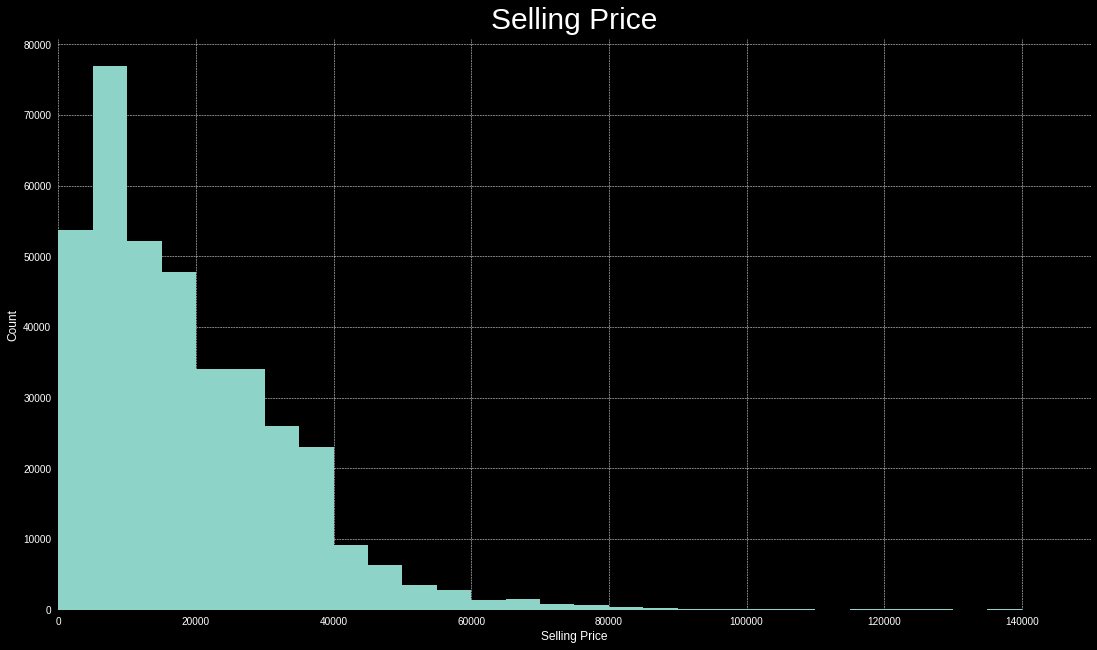

In [ ]:
# Kedree
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['price']
bins = range(0, 300000, 5000)

ax = plt.hist(histX, bins)
ax = plt.gca()

plt.xlim(0, 150000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.set_ylabel("Count")
ax.set_xlabel("Selling Price")

plt.title('Selling Price', fontdict={'fontsize': 30}, pad=10) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value 35 so it looks nice
plt.show()

<Figure size 576x396 with 0 Axes>

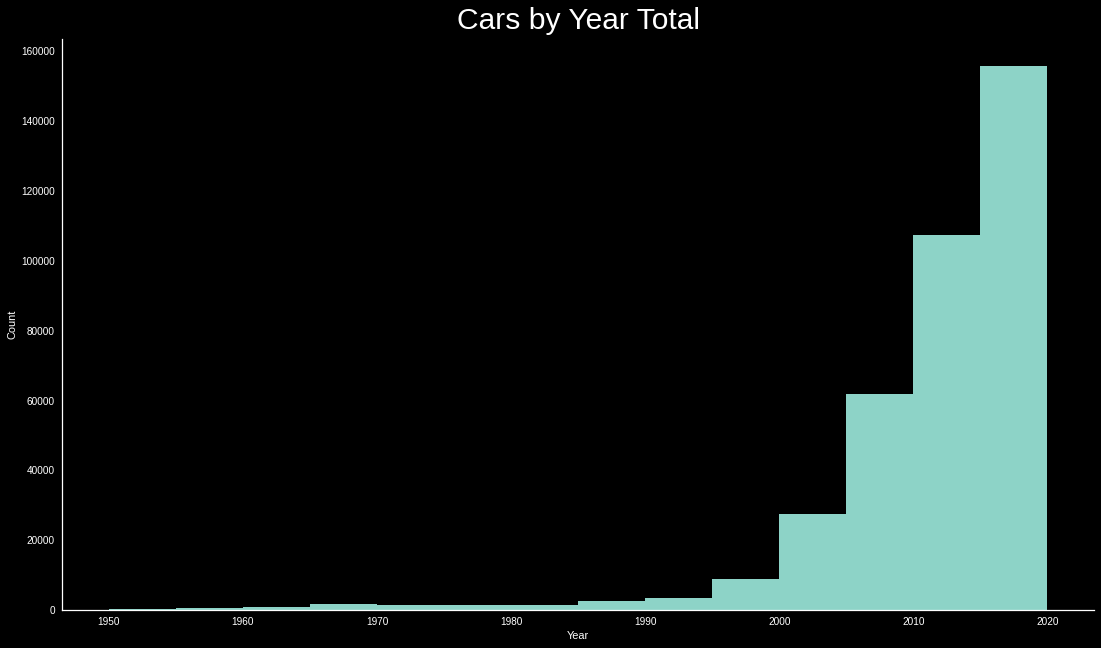

In [ ]:
#Kedree
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['year'] # Instead of price this histogram has years
bins = range(1950, 2021, 5)

ax = plt.hist(histX, bins)
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.set_ylabel("Count")
ax.set_xlabel("Year")

plt.title('Cars by Year Total', fontdict={'fontsize': 30}, pad=10) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value 35 so it looks nice
plt.show()

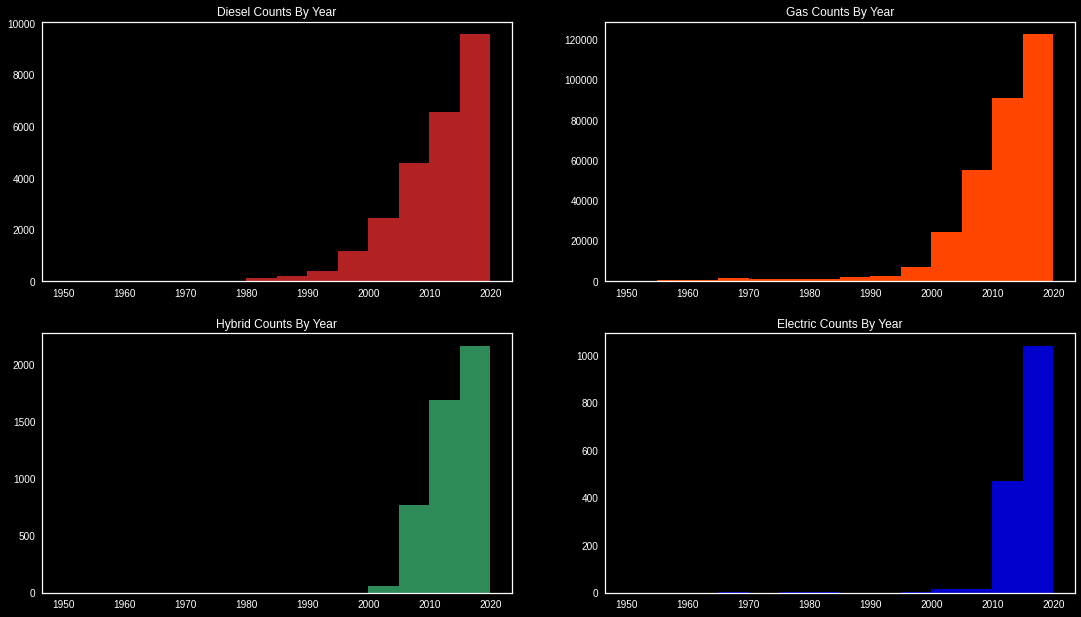

In [ ]:
#Kedree
fig, axs = plt.subplots(2, 2) # make a 2x2 figure with 4 plots
bins = range(1950, 2021, 5) # bins is the same for all plots

currentTF = usedCar['fuel'].str.contains("diesel", na=False) # Get a TF list that finds all rows with type set to diesel
df1 = usedCar[currentTF] # make a dataframe with only diesel rows
currentTF = usedCar['fuel'].str.contains("gas", na=False)
df2 = usedCar[currentTF]
currentTF = usedCar['fuel'].str.contains("hybrid", na=False)
df3 = usedCar[currentTF]
currentTF = usedCar['fuel'].str.contains("electric", na=False)
df4 = usedCar[currentTF]

histx = [[df1, df2],
         [df3, df4]] # make a 2x2 list of our dataframes for easier reference

axs[0, 0].hist(histx[0][0]['year'], bins, color="firebrick") # Make a histogram with the diesel data
axs[0, 0].set_title("Diesel Counts By Year") # Set its title
axs[0, 1].hist(histx[0][1]['year'], bins, color="orangered") 
axs[0, 1].set_title("Gas Counts By Year")
axs[1, 0].hist(histx[1][0]['year'], bins, color="seagreen")
axs[1, 0].set_title("Hybrid Counts By Year")
axs[1, 1].hist(histx[1][1]['year'], bins, color="mediumblue")
axs[1, 1].set_title("Electric Counts By Year")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

```Kedree```

### Scatter Plot

<Figure size 432x288 with 0 Axes>

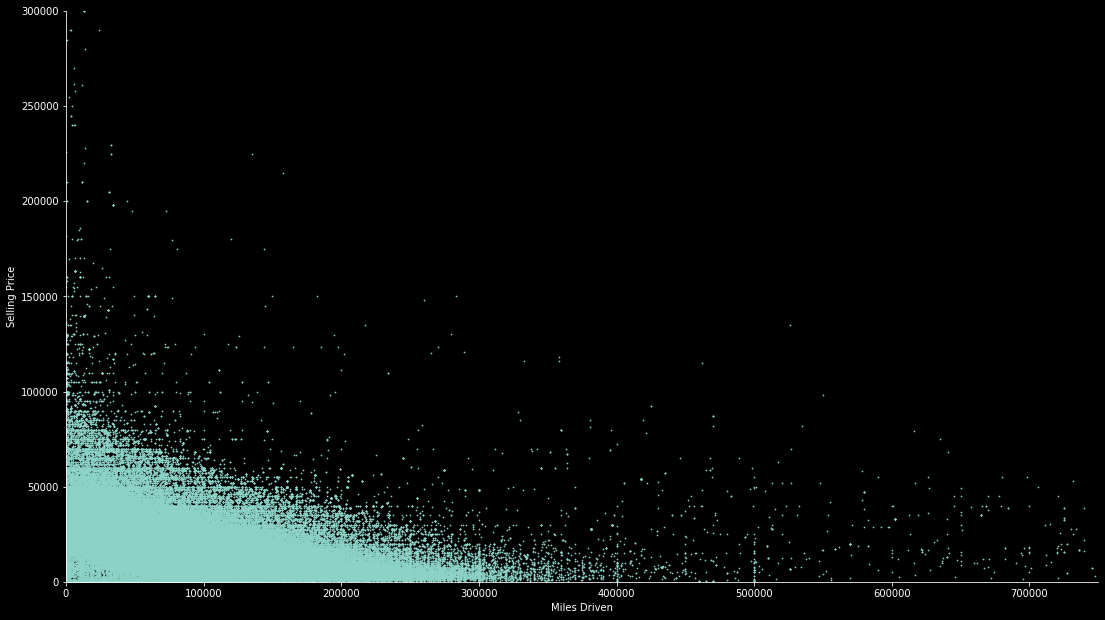

In [ ]:
# Kedree
plt.figure()
fig, ax = plt.subplots()

y = usedCar['price']
x = usedCar['odometer']

ax = plt.scatter(x, y, s=.5)

plt.ylim(0, 300000)
plt.xlim(0, 750000)

ax = plt.gca()
#ax.set_xscale('log')
#ax.set_yscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.set_ylabel("Selling Price")
ax.set_xlabel("Miles Driven")

plt.show()

<Figure size 432x288 with 0 Axes>

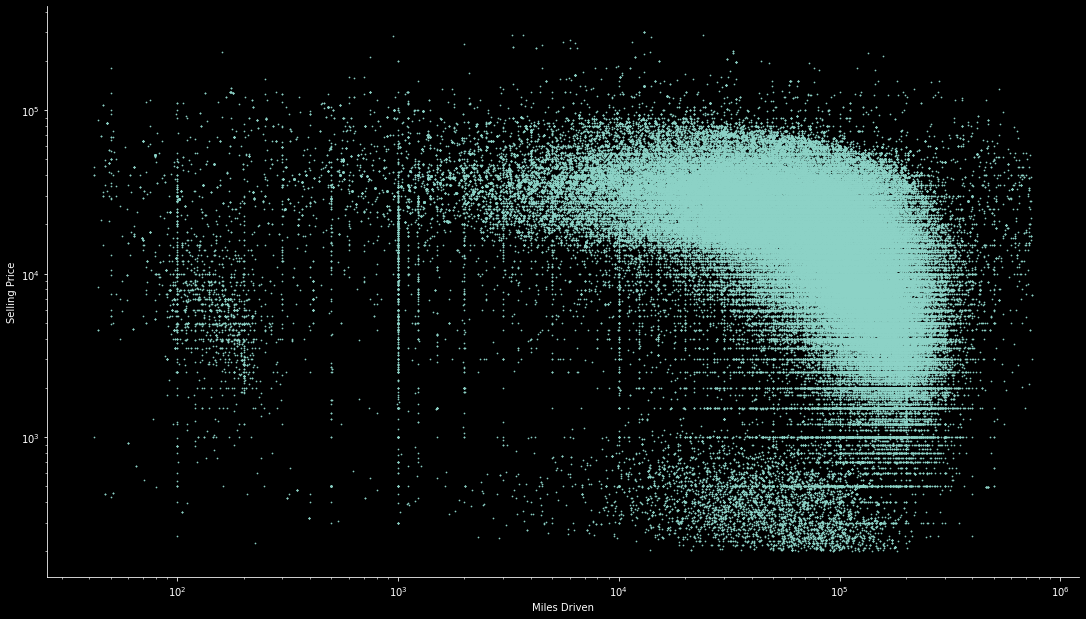

In [ ]:
# Kedree
plt.figure() # Same as above but log scales
fig, ax = plt.subplots()

y = usedCar['price']
x = usedCar['odometer']

ax = plt.scatter(x, y, s=.5)

#plt.ylim(0, 300000)
#plt.xlim(0, 750000)

ax = plt.gca()
ax.set_xscale('log') # Log Scales for x and y
ax.set_yscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.set_ylabel("Selling Price")
ax.set_xlabel("Miles Driven")

plt.show()

```Kedree```

Not sure if I should do just one axis or both on log scale...

```Kedree```

### Hex Bin

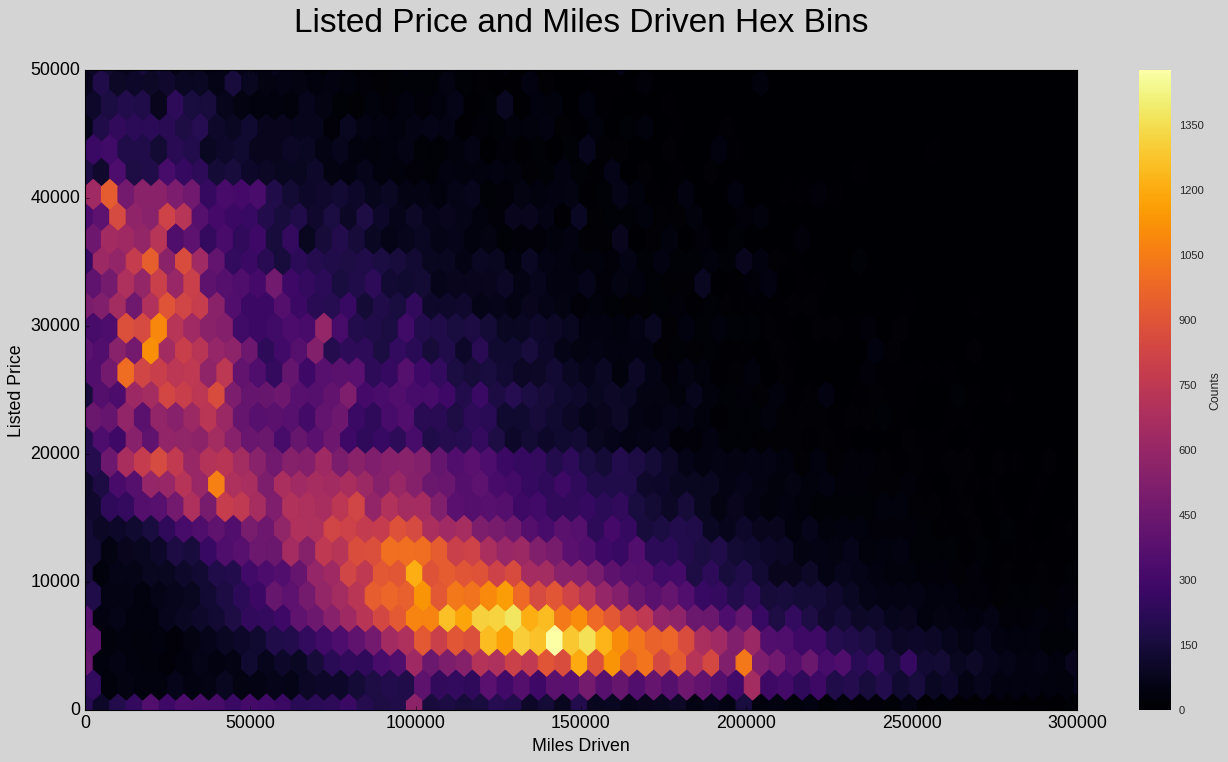

In [ ]:
#Kedree
y = usedCar['price']
x = usedCar['odometer']

plt.hexbin(x, y, gridsize = 150, cmap ='inferno') # Make a hexbin with the same axis as above, gridsize 150 was done through trial and error, inferno chosen because it sounds dope
plt.title('Listed Price and Miles Driven Hex Bins', fontdict={'fontsize': 30}, pad=35) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value 35 so it looks nice

plt.style.use("seaborn")

plt.ylim(0, 50000) # Set miles driven limit
plt.xlim(0, 300000) # Set listed price limit

ax = plt.gca()

ax.set_ylabel("Listed Price") # Label the y axis
ax.set_xlabel("Miles Driven") # Label the x axis

ax.set_facecolor([0, 0, 0]) # Sets the background color of the plot to black to hide some of the white space

fig = plt.gcf()

fig.set_size_inches(20, 10) # Makes big

plt.rcParams.update({'font.size': 16}) # Changes the axis font sizes

fig.patch.set_facecolor([.83, .83, .83]) # Set the figure background color to light grey for the pretty
plt.colorbar(label='Counts') # Make a colorbar legend and Label the colorbar

plt.show() # Release the plot

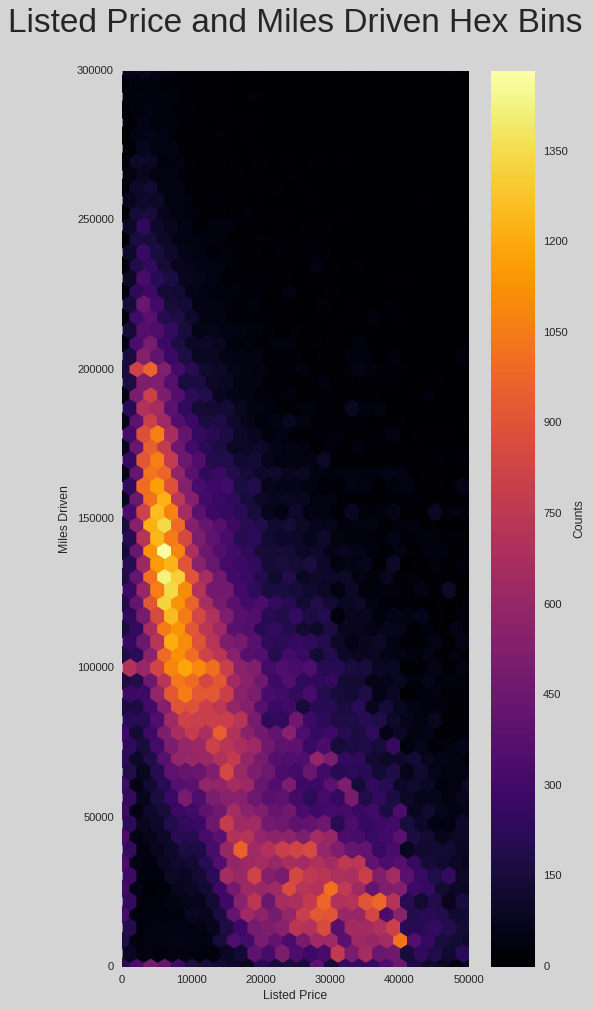

In [ ]:
x = usedCar['price'] # SWAPPED THE AXIS
y = usedCar['odometer']

plt.hexbin(x, y, gridsize = 150, cmap ='inferno') # Make a hexbin with the same axis as above, gridsize 150 was done through trial and error, inferno chosen because it sounds dope
plt.title('Listed Price and Miles Driven Hex Bins', fontdict={'fontsize': 30}, pad=35) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value 35 so it looks nice

plt.xlim(0, 50000) # Set miles driven limit
plt.ylim(0, 300000) # Set listed price limit

ax = plt.gca()

ax.set_xlabel("Listed Price") # Label the y axis
ax.set_ylabel("Miles Driven") # Label the x axis

ax.set_facecolor([0, 0, 0]) # Sets the background color of the plot to black to hide some of the white space

#ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc.
#ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc.
#ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc., can be alterted like %.2f for decimals

fig = plt.gcf()

fig.set_size_inches(7, 14) # Makes big

plt.rcParams.update({'font.size': 16}) # Changes the axis font sizes

fig.patch.set_facecolor([.83, .83, .83]) # Set the figure background color to light grey for the pretty
plt.colorbar(label='Counts') # Make a colorbar legend and Label the colorbar

plt.show() # Release the plot

```Kedree```

### Geographic Data

Here is some geographical representation via R; see the code in the rest of the github, here is a screenshot:

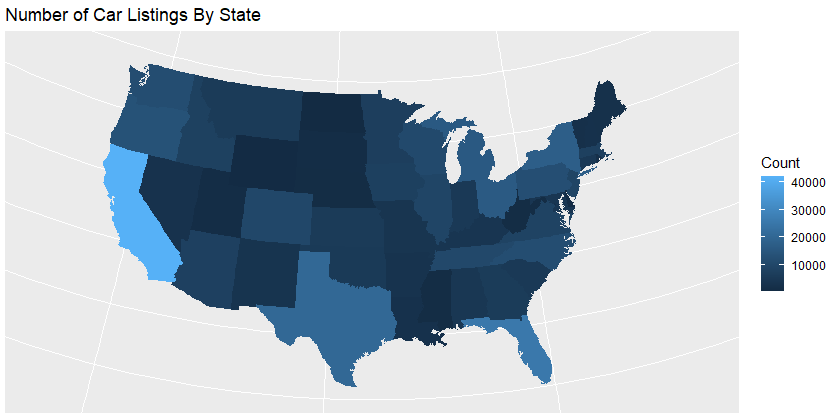



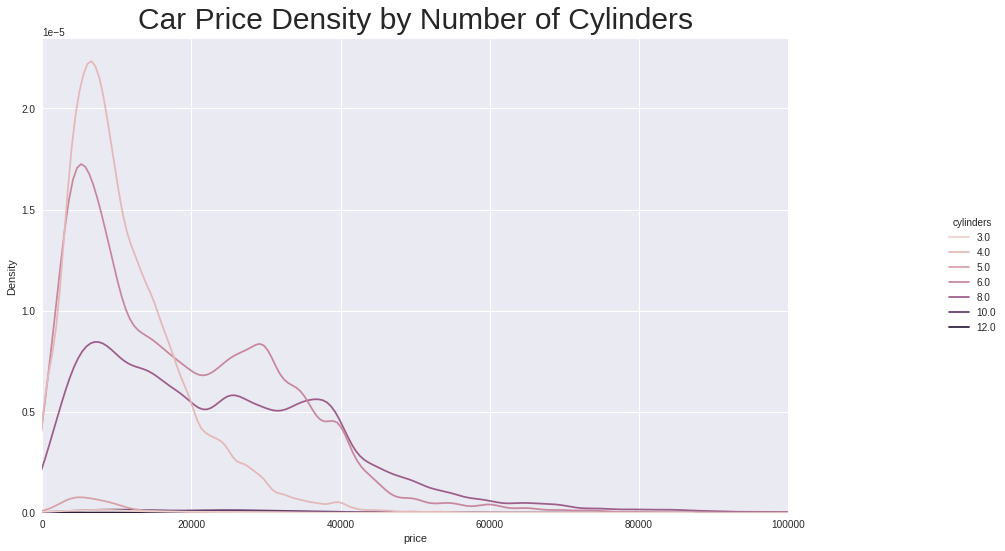

In [ ]:
#Kedree
plt.style.use("seaborn")

rangedData = usedCar[(usedCar['price'] >= 0) & (usedCar['price'] <= 100000)] # Smoothes the chart and gets rind of outliers above 100,000

sns.displot(data=rangedData, x='price', hue='cylinders', kind='kde') # Make a displot with the x axis being the price and the different lines being that of different cylinders

plt.xlim(0, 100000) # Set the price figure limits
plt.title('Car Price Density by Number of Cylinders', fontdict={'fontsize': 30}, pad=10) # Gives it a title

fig = plt.gcf()
fig.set_size_inches(15, 8) # Makes big

# Really wish I could move the legend left easily

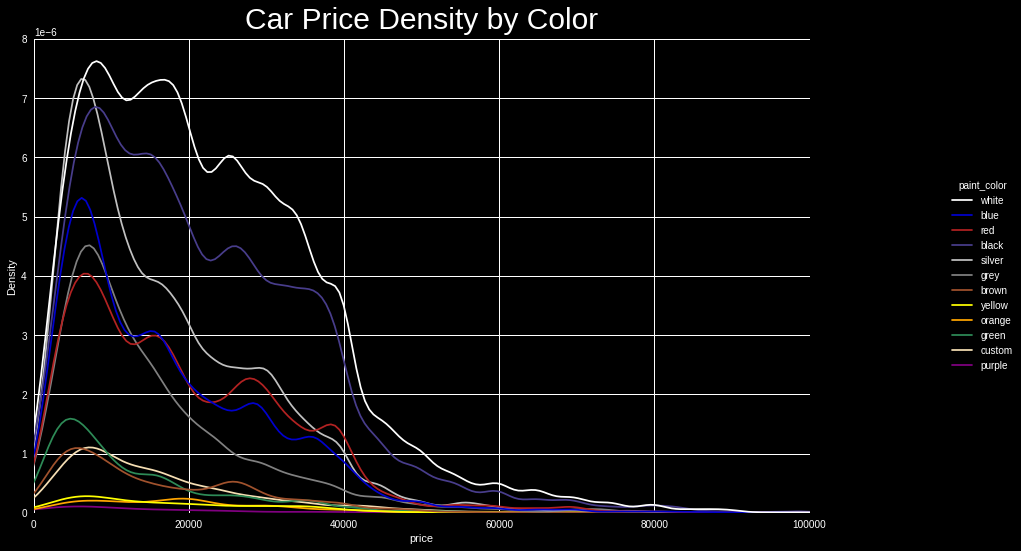

In [ ]:
#Kedree
plt.style.use("dark_background")

colors = sns.color_palette(["white", "mediumblue", "firebrick", "darkslateblue", "silver", "grey", "sienna", "yellow", "orange", "seagreen", "wheat", "purple"])

rangedData = usedCar[(usedCar['price'] >= 0) & (usedCar['price'] <= 100000)] # Smoothes the chart and gets rind of outliers above 100,000

sns.displot(data=rangedData, x='price', hue='paint_color', kind='kde', palette=colors) # Make a displot with the x axis being the price and the different lines being that of different cylinders

plt.xlim(0, 100000) # Set the price figure limits
plt.title('Car Price Density by Color', fontdict={'fontsize': 30}, pad=10) # Gives it a title

fig = plt.gcf()
fig.set_size_inches(15, 8) # Makes big

# Really wish I could move the legend left easily LIKE I REALLY WANT TO MOVE IT PLEASE LOOK UP LATER

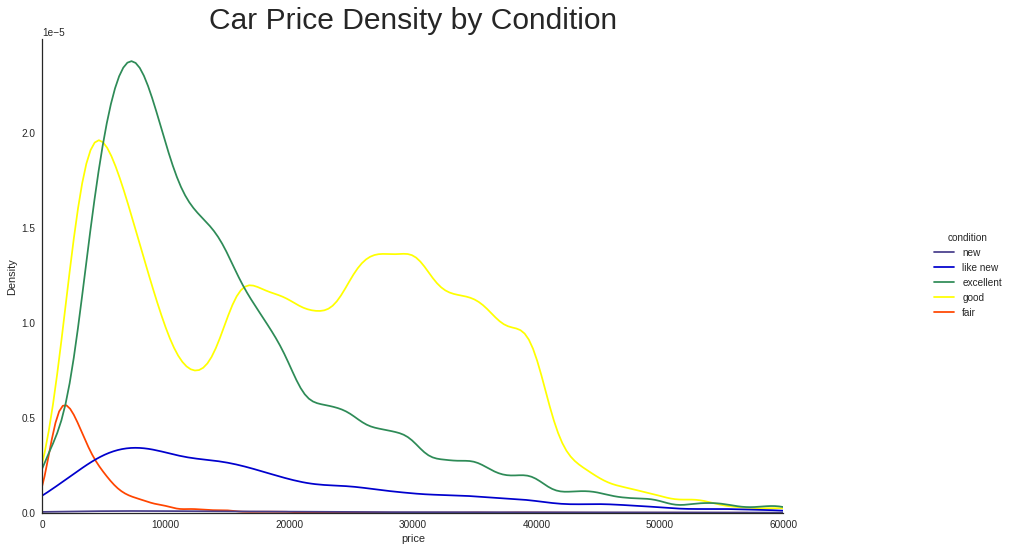

In [ ]:
#Kedree
plt.style.use("seaborn-white")

colors = sns.color_palette(["darkslateblue", "mediumblue", "seagreen", "yellow", "orangered"])

rangedData = usedCar[(usedCar['price'] >= 0) & (usedCar['price'] <= 60000)] # Smoothes the chart and gets rind of outliers above 100,000

sns.displot(data=rangedData, x='price', hue='condition', kind='kde', hue_order = ['new', 'like new', 'excellent', 'good', 'fair'], palette = colors) # Make a displot with the x axis being the price and the different lines being that of different cylinders

plt.xlim(0, 60000) # Set the price figure limits
plt.title('Car Price Density by Condition', fontdict={'fontsize': 30}, pad=10) # Gives it a title

fig = plt.gcf()
fig.set_size_inches(15, 8) # Makes big

# Really wish I could move the legend left easily

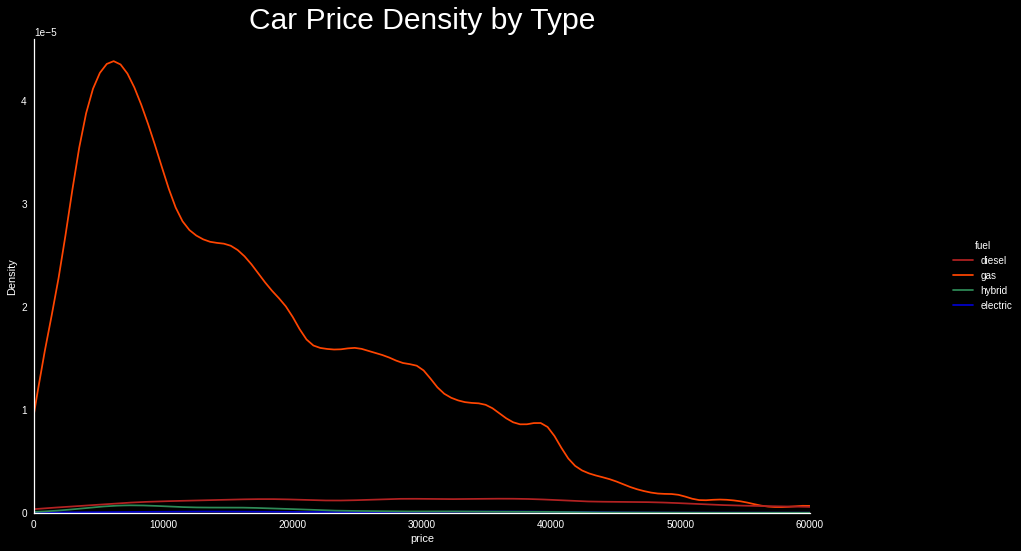

In [ ]:
#Kedree
plt.style.use("dark_background")

colors = sns.color_palette(["firebrick", "orangered", "seagreen", "mediumblue"])

rangedData = usedCar[(usedCar['price'] >= 0) & (usedCar['price'] <= 100000)] # Smoothes the chart and gets rind of outliers above 100,000

sns.displot(data=rangedData, x='price', hue='fuel', kind='kde', hue_order = ['diesel', 'gas', 'hybrid', 'electric'], palette = colors) # Make a displot with the x axis being the price and the different lines being that of different cylinders

plt.xlim(0, 60000) # Set the price figure limits
plt.title('Car Price Density by Type', fontdict={'fontsize': 30}, pad=10) # Gives it a title

fig = plt.gcf()
fig.set_size_inches(15, 8) # Makes big

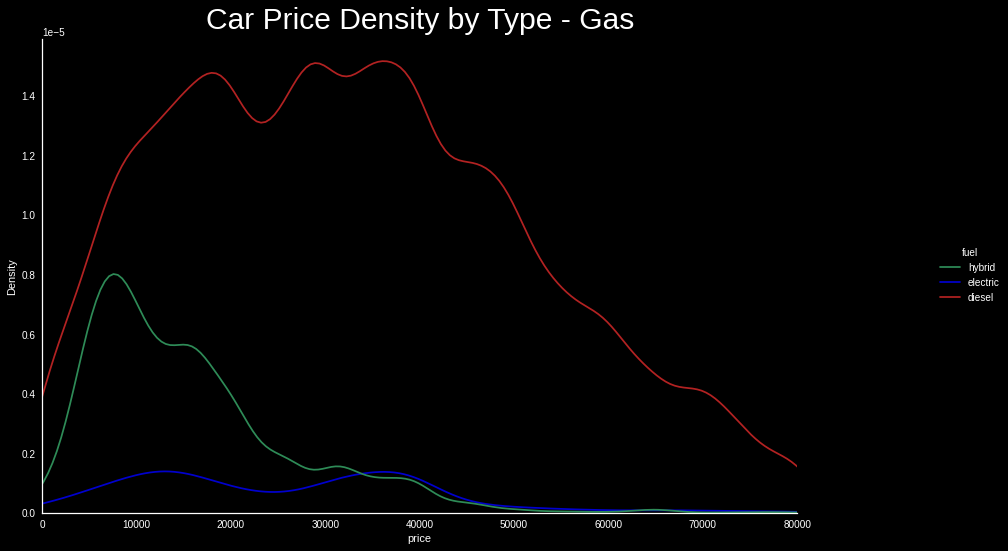

In [ ]:
#Kedree
plt.style.use("dark_background")

colors = sns.color_palette(["seagreen", "mediumblue", "firebrick"])

rangedData = usedCar[(usedCar['price'] >= 0) & (usedCar['price'] <= 80000)] # Smoothes the chart and gets rind of outliers above 100,000
test1 = rangedData['fuel'].str.contains("hybrid").to_list()
test2 = rangedData['fuel'].str.contains("electric").to_list()
test3 = rangedData['fuel'].str.contains("diesel").to_list()
test4 = np.logical_or(test1, test2)
test5 = np.logical_or(test4, test3)
rangedData = rangedData[test5]

sns.displot(data=rangedData, x='price', hue='fuel', kind='kde', hue_order = ['hybrid', 'electric', 'diesel'], palette = colors) # Make a displot with the x axis being the price and the different lines being that of different cylinders

plt.xlim(0, 80000) # Set the price figure limits
plt.title('Car Price Density by Type - Gas', fontdict={'fontsize': 30}, pad=10) # Gives it a title

fig = plt.gcf()
fig.set_size_inches(15, 8) # Makes big

# Really wish I could move the legend left easily

```Kedree```

The twin peaks of the electric is most likely cheaper cars like Nissan Leafs and more expensive cars like Teslas, the hybrid market is much more spread out, there are more hybrids in lower cost area.

Its crazy to me that diesels are so expensive, it must be that those offering on craigslist for diesel cars are offering older, collectible cars. Lets see if thats true

In [ ]:
#Kedree
dieselTF = usedCar['fuel'].str.contains("diesel", na=False)
diesels = usedCar[dieselTF]

diesels['year'].mean()# Well it looks like I may be wrong

2010.701663571344

In [ ]:
usedCar = pd.read_csv('/content/drive/MyDrive/vehiclesClean3.csv')

<Figure size 576x396 with 0 Axes>

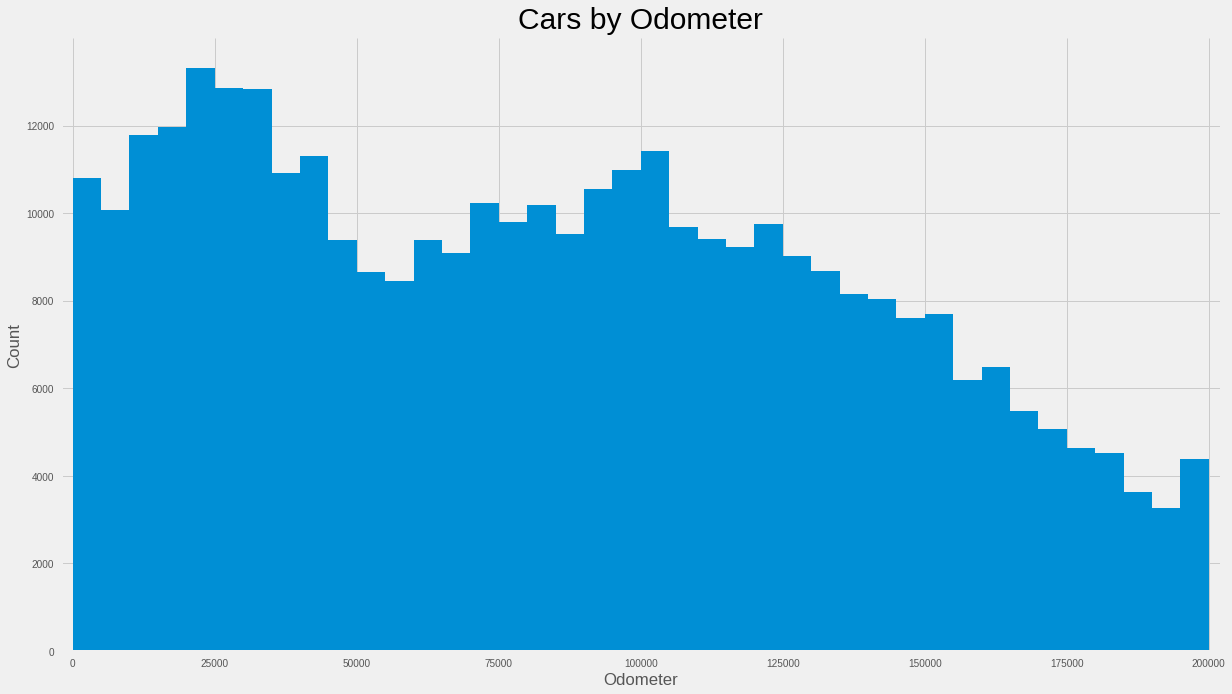

In [ ]:
#Zac 
plt.style.use("fivethirtyeight")

plt.figure()
fig, ax = plt.subplots()

histX = usedCar['odometer']
bins = range(0, 200001, 5000) 

plt.xlim(-2000, 202000)

ax = plt.hist(histX, bins)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.set_ylabel("Count")
ax.set_xlabel("Odometer")

plt.title('Cars by Odometer', fontdict={'fontsize': 30}, pad=10) # Gives it a title

plt.show()

Should we increase bin size a little?

In [ ]:
#Zac 
westernStates = ['wa', 'ca', 'or', 'nv', 'id', 'mt', 'co', 'wy', 'ut']
southWesternStates = ['az', 'nm', 'ok', 'tx']
southEasternStates = ['ak', 'la', 'ms', 'fl','al','ga','tn','ky','sc','nc','va','wv']
midWesternStates = ['mi','oh','in','il','ia','mn','mo','ks','ne','wi','nd','sd']
northEasternStates = ['ny','nj','pa','md','de','dc','ma','me','vt','nh','ri','ct']

temp = usedCar.groupby(by = 'state').mean().reset_index().sort_values(by='odometer')

westernValues = temp.loc[temp['state'].isin(westernStates)]
westernValues.insert(loc=0, column='location', value='r')

southWesternValues = temp.loc[temp['state'].isin(southWesternStates)]
southWesternValues.insert(loc=0, column='location', value='b')

southEasternValues = temp.loc[temp['state'].isin(southEasternStates)]
southEasternValues.insert(loc=0, column='location', value='y')

midWesternValues = temp.loc[temp['state'].isin(midWesternStates)]
midWesternValues.insert(loc=0, column='location', value='g')

northEasternValues = temp.loc[temp['state'].isin(northEasternStates)]
northEasternValues.insert(loc=0, column='location', value='m')

frames = [westernValues, southWesternValues, southEasternValues, midWesternValues, northEasternValues]
temp = pd.concat(frames)

#temp = temp.sort_values(by = 'odometer') #changes whether or not they are sorted by region or by value 

plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.style.use("dark_background")

barPlot = plt.barh(temp['state'],temp['odometer'], color=temp['location']) 
ax = plt.gca()
ax.set_xlabel("Odometer")

plt.title('Average Odometer by State', fontdict={'fontsize': 30}, pad=10) # Gives it a title
plt.legend(barPlot, ['Western', 'South Western', 'South Eastern', 'Mid Western', 'North Eastern'], loc='upper right')

plt.show() 

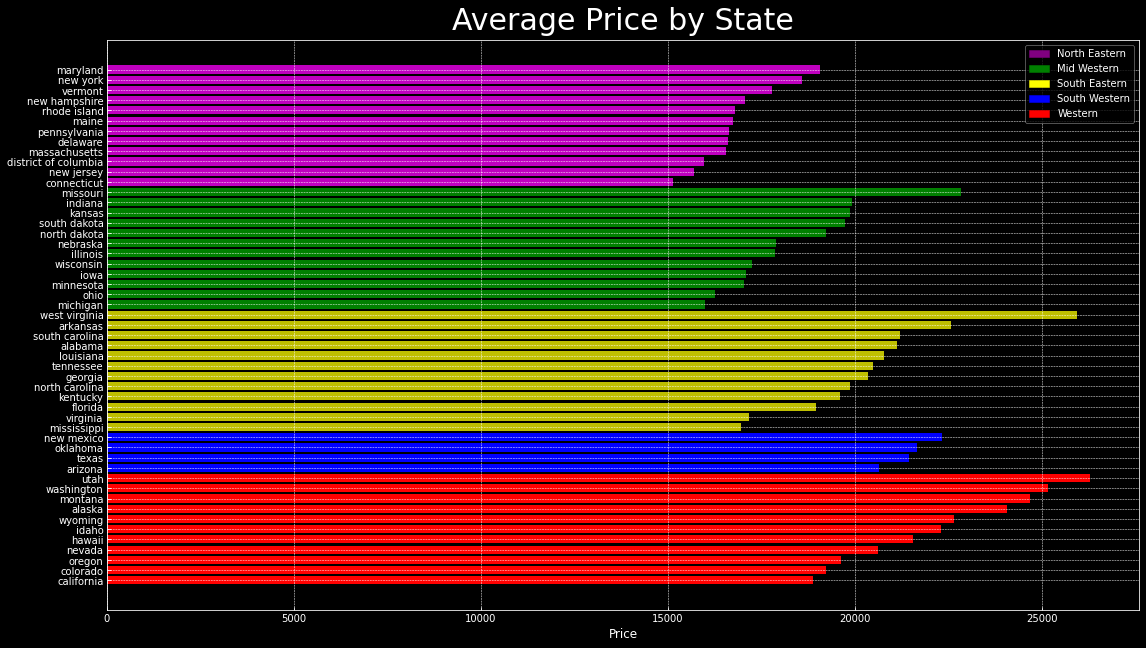

In [4]:
plt.style.use("bmh")
plt.style.use("dark_background")

# Made by Zac, altered by Kedree for price and a diff dataset
westernStates = ['colorado','oregon','wyoming','california','idaho','montana','utah','washington','nevada', 'hawaii','alaska']
southWesternStates = ['texas','oklahoma','arizona', 'new mexico']
southEasternStates = ['mississippi','virginia','north carolina','louisiana','tennessee','florida','alabama','kentucky','georgia','south carolina','west virginia', 'arkansas']
midWesternStates = ['north dakota','south dakota','michigan','nebraska','minnesota','iowa','ohio','kansas','wisconsin','illinois','indiana','missouri']
northEasternStates = ['maine','delaware','rhode island','connecticut','new hampshire','new jersey','district of columbia','vermont','pennsylvania','massachusetts','maryland','new york']

temp = usedCar.groupby(by = 'region').mean().reset_index().sort_values(by='price')

westernValues = temp.loc[temp['region'].isin(westernStates)]
westernValues.insert(loc=0, column='location', value='r')

southWesternValues = temp.loc[temp['region'].isin(southWesternStates)]
southWesternValues.insert(loc=0, column='location', value='b')

southEasternValues = temp.loc[temp['region'].isin(southEasternStates)]
southEasternValues.insert(loc=0, column='location', value='y')

midWesternValues = temp.loc[temp['region'].isin(midWesternStates)]
midWesternValues.insert(loc=0, column='location', value='g')

northEasternValues = temp.loc[temp['region'].isin(northEasternStates)]
northEasternValues.insert(loc=0, column='location', value='m')

frames = [westernValues, southWesternValues, southEasternValues, midWesternValues, northEasternValues]
temp = pd.concat(frames)

#temp = temp.sort_values(by = 'odometer') #changes whether or not they are sorted by region or by value 

plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

barPlot = plt.barh(temp['region'],temp['price'], color=temp['location']) 
ax = plt.gca()
ax.set_xlabel("Price")

plt.title('Average Price by State', fontdict={'fontsize': 30}, pad=10) # Gives it a title
plt.legend(barPlot, ['North Eastern', 'Mid Western', 'South Eastern', 'South Western', 'Western'], loc='upper right')

leg = ax.get_legend()
leg.legendHandles[0].set_color('purple')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('yellow')
leg.legendHandles[3].set_color('blue')
leg.legendHandles[4].set_color('red')

plt.show() 

In [ ]:
usedCar.groupby(by = 'region').mean().sort_values(by='price', ascending=False)

,price,year,cylinders,odometer
region,,,,
utah,26290.929907,2011.114953,6.110028,88389.967290
west virginia,25927.720954,2012.463693,6.705009,78953.204357
washington,25170.396280,2012.308340,6.071304,84164.664815
montana,24680.735849,2011.739280,6.156698,91215.260034
alaska,24057.709764,2013.211406,5.634491,71928.734548
missouri,22849.615586,2012.868462,6.166412,84947.290533
wyoming,22652.960644,2010.055456,6.566879,92985.320215
arkansas,22569.144832,2012.624254,6.166922,90191.395539
new mexico,22337.562193,2010.809812,6.195876,81119.005195


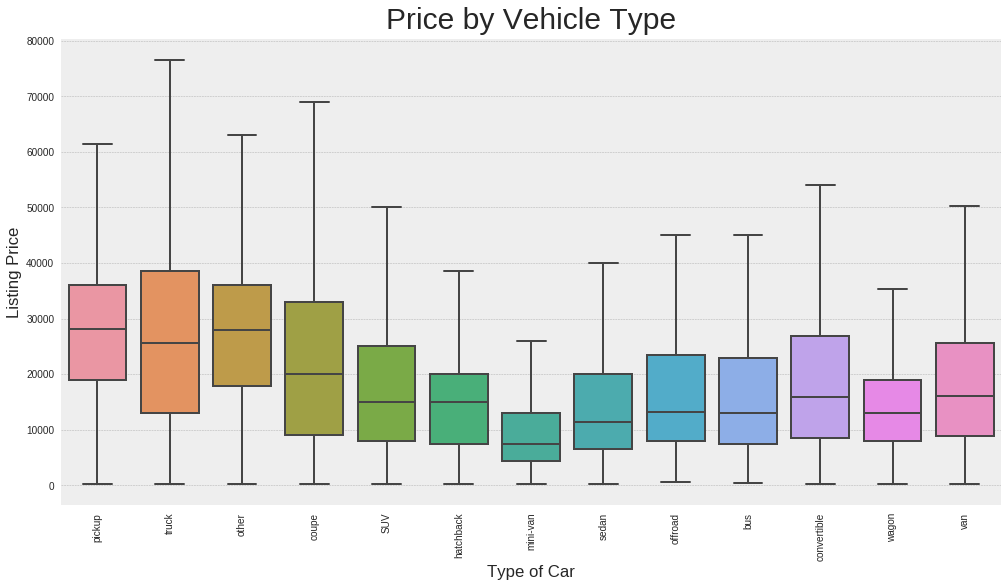

In [ ]:
#Zac
plt.style.use("bmh") # I messed up the plt style, I think this is the original?

temp = usedCar.loc[usedCar['price'] > 400]
temp = usedCar.loc[usedCar['price'] < 100000]
temp.dropna() 

plt.figure(figsize = (15,8))
ax = sns.boxplot(data=temp, x='type', y='price', showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

ax.set_xlabel("Type of Car")
ax.set_ylabel("Listing Price")
plt.title('Price by Vehicle Type', fontdict={'fontsize': 30}, pad=10) # Gives it a title

plt.show() 

Should we remove the outliers above 60,000 or leave it? Genuine question because it shows a little info about how minivans have none high value but we may get more info out of seeingthe distributions of the others better

There are no correct answers in life, only trade-offs, which would you prefer?

Love this idea just wish I could see a little better

Maybe some sort of trend line or moving average?

Also the colors feel backwards to me new being white makes me feel like its lower quality, also it doesnt show up on the white background well.

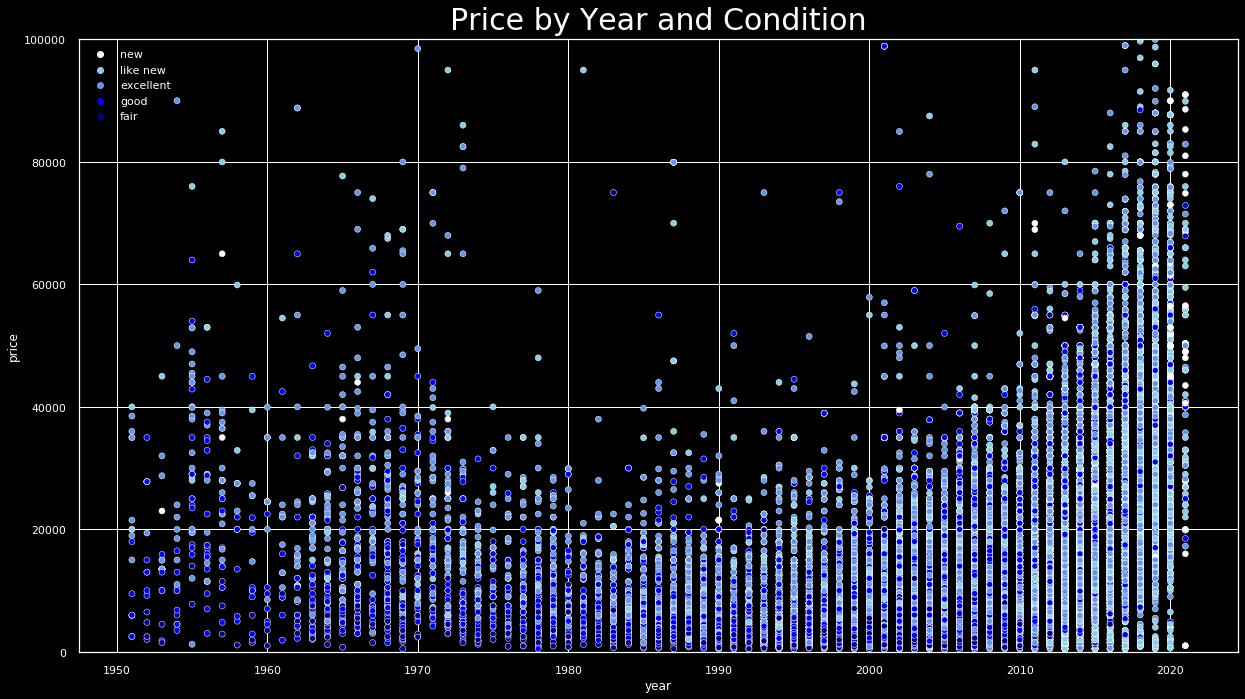

In [ ]:
#Zacs default dot size
temp = usedCar.dropna()
temp = temp.loc[temp['price'] >= 500]
temp = temp.loc[temp['price'] <= 100000]
temp = temp.loc[temp['condition'] != 'salvage']

palette ={"new": "white", "like new": "skyblue", "excellent": "cornflowerblue", "good": "blue", "fair": "darkblue", "salvage": "black"}

plt.ylim(0, 100000)

sns.set(rc={'figure.figsize':(18.5, 10.5)})
plt.style.use("dark_background")
sns.scatterplot(x="year", y="price", hue="condition", legend=True, palette=palette, data=temp)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 4, 0, 1, 3]
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.title('Price by Year and Condition', fontdict={'fontsize': 30}, pad=10) # Gives it a title

plt.show() 

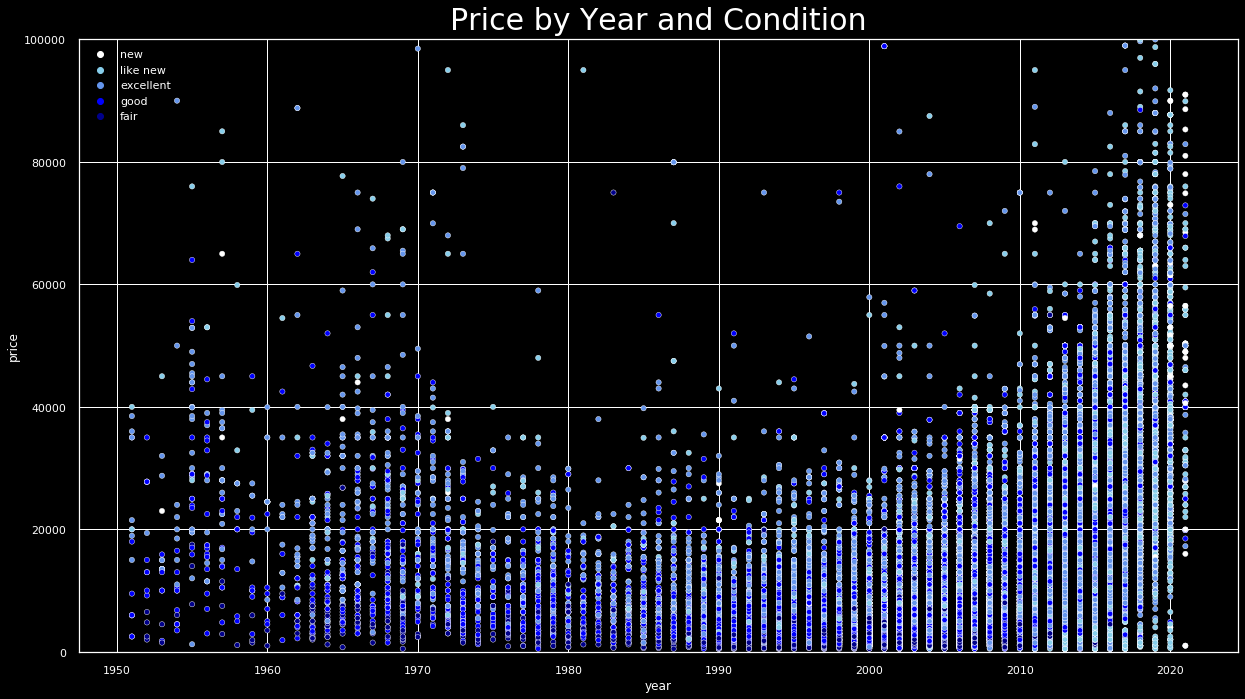

In [ ]:
#Zacs altered with smaller dot size by Kedree
temp = usedCar.dropna()
temp = temp.loc[temp['price'] >= 500]
temp = temp.loc[temp['price'] <= 100000]
temp = temp.loc[temp['condition'] != 'salvage']

palette ={"new": "white", "like new": "skyblue", "excellent": "cornflowerblue", "good": "blue", "fair": "darkblue", "salvage": "black"}

sns.set(rc={'figure.figsize':(18.5, 10.5)})
plt.style.use("dark_background")
sns.scatterplot(x="year", y="price", hue="condition", legend=True, palette=palette, data=temp, s=28)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 4, 0, 1, 3]
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.title('Price by Year and Condition', fontdict={'fontsize': 30}, pad=10) # Gives it a title

plt.ylim(0, 100000)

plt.show() 

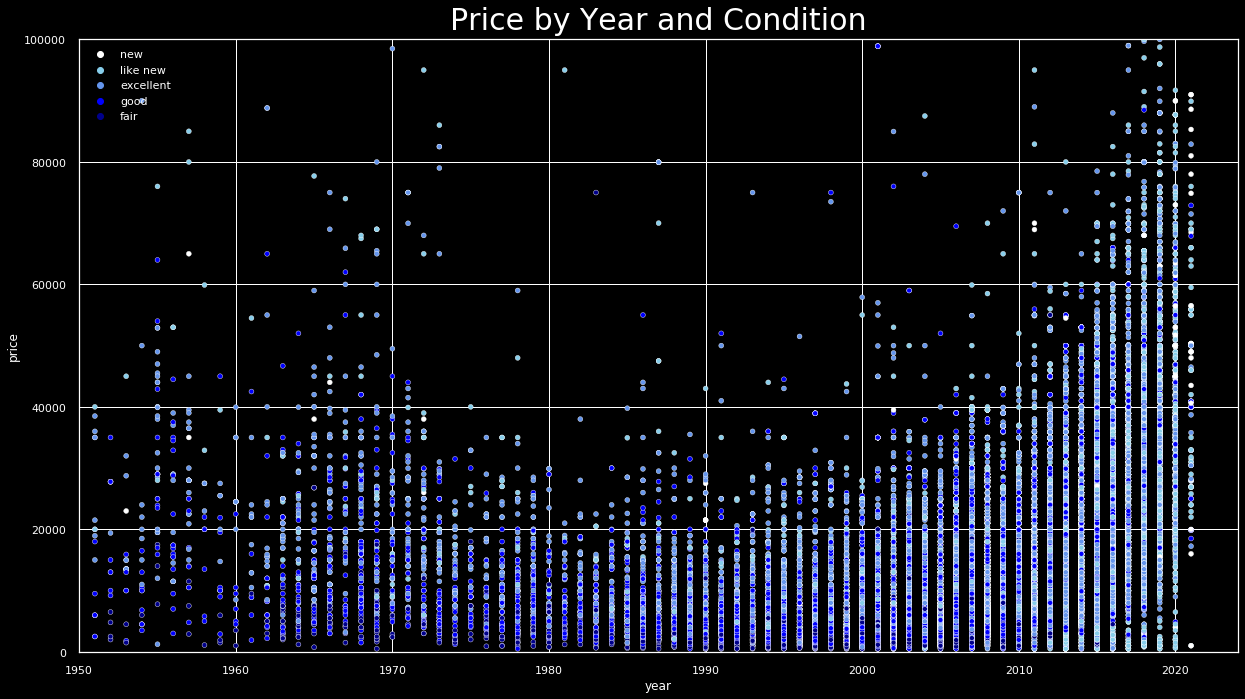

In [ ]:
#Zacs altered with even smaller dot size by Kedree
temp = usedCar.dropna()
temp = temp.loc[temp['price'] >= 500]
temp = temp.loc[temp['price'] <= 100000]
temp = temp.loc[temp['condition'] != 'salvage']

palette ={"new": "white", "like new": "skyblue", "excellent": "cornflowerblue", "good": "blue", "fair": "darkblue", "salvage": "black"}

sns.set(rc={'figure.figsize':(18.5, 10.5)})
plt.style.use("dark_background")
sns.scatterplot(x="year", y="price", hue="condition", legend=True, palette=palette, data=temp, s=24)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 4, 0, 1, 3]
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper left')
plt.title('Price by Year and Condition', fontdict={'fontsize': 30}, pad=10) # Gives it a title

plt.ylim(0, 100000)
plt.xlim(1950, 2024)

plt.show() 

Conclusions are in presentation.

##*Fin.*